## Import Statements

In [ ]:
#Removed Highly Colrelated Features

In [1]:
import pandas as pd 
import numpy as np
import os
import glob   
import gc
import time 
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef766
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm, tqdm_pandas
from bs4 import BeautifulSoup
#Plotly Tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls
init_notebook_mode(connected=True)
#https://stackoverflow.com/questions/55132071/series-object-has-no-attribute-iplot/55132247
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import iplot
import plotly.graph_objs as go
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Global Variables

In [2]:
_PickleFilesFolder="pickle_files"
_PickleFile_Merged_Listing_NY="Merged_Listing_NY"
_PickleFile_Vectorized_Data="NY_Vectors"
scaler = MinMaxScaler()

# Helper Methods

# Load Data

In [3]:
_DF_vector_train =pd.read_pickle(_PickleFilesFolder + "/" + _PickleFile_Vectorized_Data + "_train")

In [4]:
_DF_vector_test =pd.read_pickle(_PickleFilesFolder + "/" + _PickleFile_Vectorized_Data + "_test")

In [5]:

X_train=pd.read_pickle(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + "train_raw")

X_test=pd.read_pickle(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + "test_raw")

In [6]:
X_train.shape

(25830, 153)

In [7]:
y_train=pd.DataFrame( np.load( _PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + "y_train_raw.npy"))

In [8]:
y_train.shape

(25830, 1)

# Check Data Skewness and Normalize Data 

In [9]:
#https://machinelearningmastery.com/power-transforms-with-scikit-learn/
#https://opendatascience.com/transforming-skewed-data-for-machine-learning/
#https://datamadness.github.io/Skewness_Auto_Transform
#https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame/blob/master/skew_autotransform.py

In [10]:
df_sorted_skew_features=X_train.skew().sort_values(ascending=False).reset_index()

In [11]:
df_sorted_skew_features

index           0
0    minimum_maximum_nights  160.696365
1            maximum_nights  160.696364
2    dec_avg_maximum_nights   32.002880
3    jan_avg_maximum_nights   31.521743
4    feb_avg_maximum_nights   31.416362
..                      ...         ...
148  host_identity_verified   -1.480862
149                 kitchen   -2.843921
150                    wifi   -5.936415
151    host_has_profile_pic  -19.132290
152        has_availability  -23.380329

[153 rows x 2 columns]

In [12]:
cols=df_sorted_skew_features['index'].values
import warnings
warnings.filterwarnings('ignore')

In [13]:
del df_sorted_skew_features

In [14]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans_p_1 = power.fit_transform(X_train)

In [15]:
df_p1=pd.DataFrame(data_trans_p_1)

In [16]:
df_p1

0         1         2         3         4         5         6    \
0      0.913101  1.047469  0.895737  2.064144  0.698029  0.698029  0.053804   
1      1.186127  1.047469  0.467636  2.064144  0.341071  0.341071  0.053804   
2      1.186127  1.047469  0.467636 -0.484462  1.222208  1.222208  0.053804   
3      1.186127  1.047469  0.823114 -0.484462  1.710938  1.710938  0.053804   
4      0.546785  1.047469  0.516436 -0.484462 -0.295391 -0.295391  0.053804   
...         ...       ...       ...       ...       ...       ...       ...   
25825 -1.013676 -0.989180  0.941247 -0.484462 -0.295391 -0.295391  0.053804   
25826  0.913101  1.047469  0.165999 -0.484462 -1.880365 -1.880365  0.053804   
25827  0.913101  1.047469  0.627420 -0.484462  2.294671  2.294671  0.053804   
25828  1.186127  1.047469 -1.198948 -0.484462 -0.295391 -0.295391  0.053804   
25829 -1.013676 -0.989180  0.697476 -0.484462 -0.295391 -0.295391  0.053804   

            7         8         9    ...       143       144       145  \
0      0.503869  0.979903 -0.301554  ...  1.002129 -0.165280  0.705700   
1      0.503869  0.480928 -0.301554  ... -1.171362  2.345273  1.754292   
2     -1.984645  1.987510  1.943795  ...  0.814309 -1.729868 -1.263932   
3      0.503869 -1.641943 -0.301554  ... -1.171362  0.849201 -1.086558   
4      0.503869 -1.641943  1.943795  ... -1.171362  0.849201 -1.630401   
...         ...       ...       ...  ...       ...       ...       ...   
25825 -1.984645  0.979903 -0.301554  ...  1.241155 -1.200388  0.145238   
25826  0.503869 -0.282712 -0.301554  ... -1.171362  1.350837  0.562650   
25827  0.503869  0.480928 -0.301554  ... -1.171362  0.344037  0.737352   
25828 -1.984645 -1.641943 -0.301554  ...  1.013515 -1.200388 -0.544806   
25829  0.503869  0.979903 -0.301554  ... -1.171362  0.344037 -0.669741   

            146       147       148       149       150       151       152  
0      0.653186  0.999688  0.163934  0.316436  0.741527 -0.349312 -0.328943  
1      2.150763 -0.946359  0.163934  0.316436 -1.348569 -0.349312  3.040045  
2      1.532566  0.927958  0.163934  0.316436  0.741527  2.862768 -0.328943  
3     -1.394436  1.125348  0.163934  0.316436  0.741527 -0.349312 -0.328943  
4      0.149234  1.107386  0.163934  0.316436  0.741527 -0.349312 -0.328943  
...         ...       ...       ...       ...       ...       ...       ...  
25825  1.110664  1.017629  0.163934  0.316436  0.741527 -0.349312 -0.328943  
25826 -0.803897 -0.351878  0.163934  0.316436  0.741527 -0.349312 -0.328943  
25827  0.747979  0.766778  0.163934  0.316436  0.741527  2.862768 -0.328943  
25828 -0.182429 -0.140288  0.163934  0.316436 -1.348569 -0.349312  3.040045  
25829 -0.419139 -1.394246  0.163934  0.316436  0.741527 -0.349312 -0.328943  

[25830 rows x 153 columns]

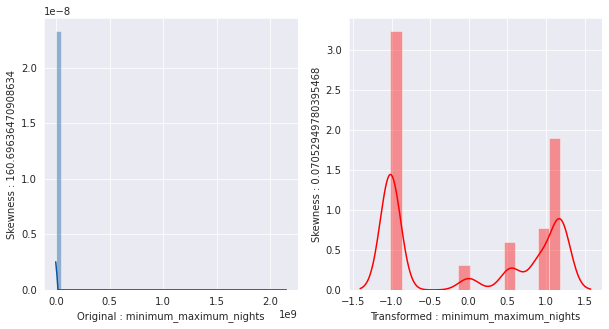

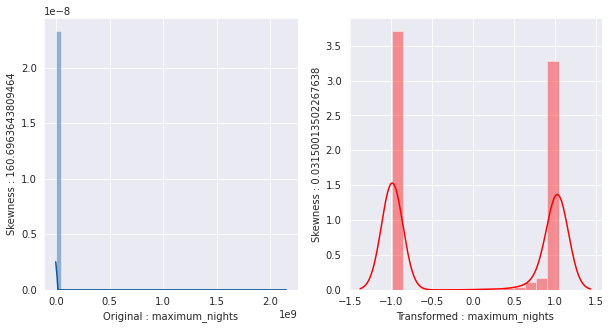

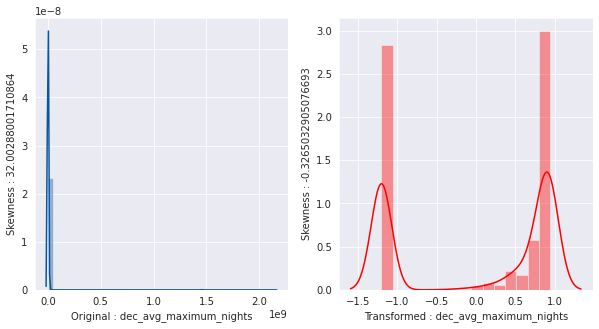

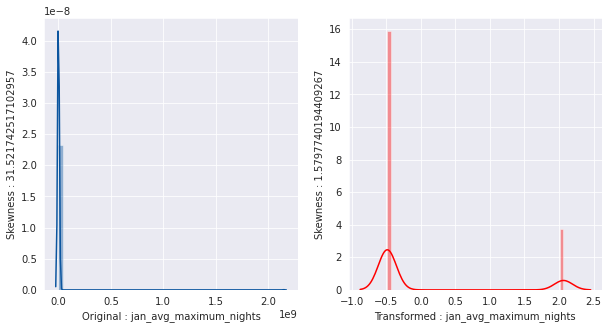

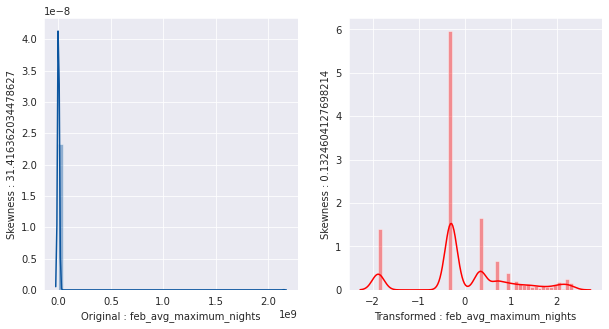

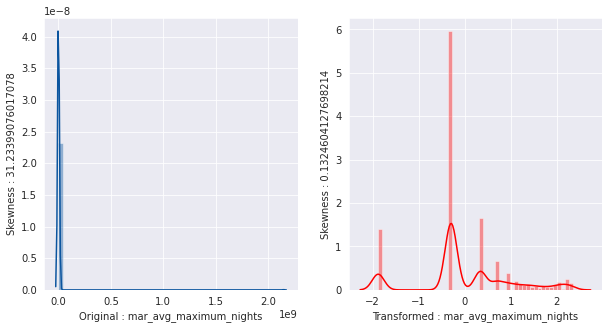

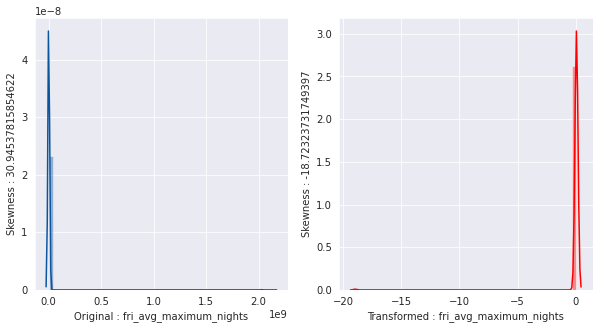

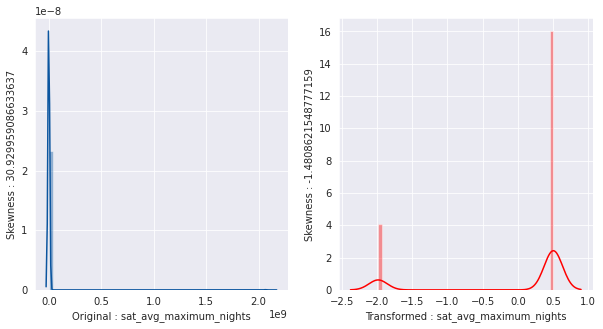

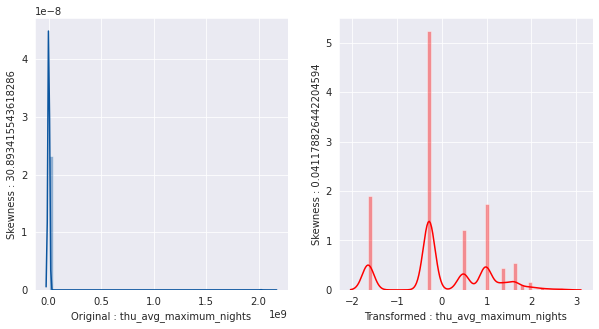

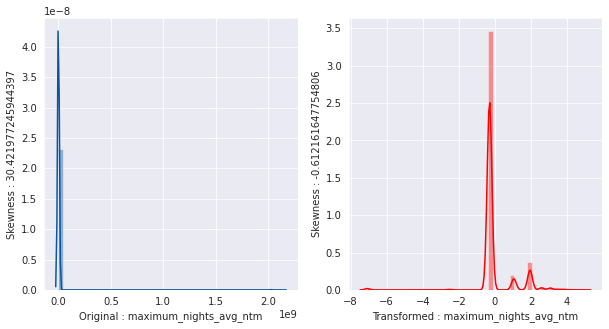

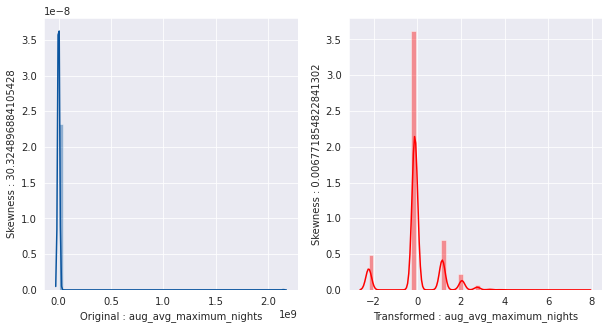

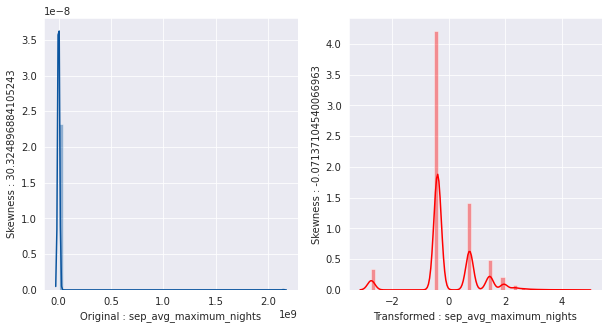

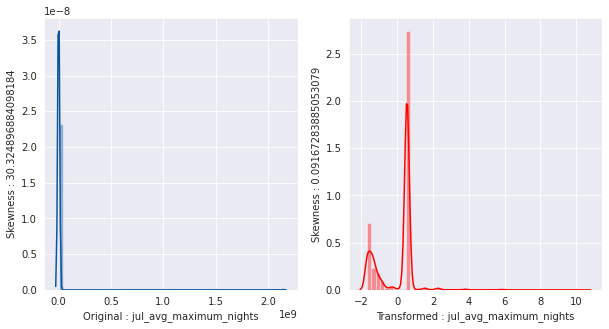

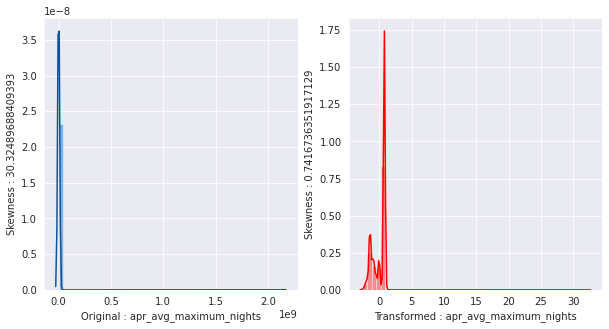

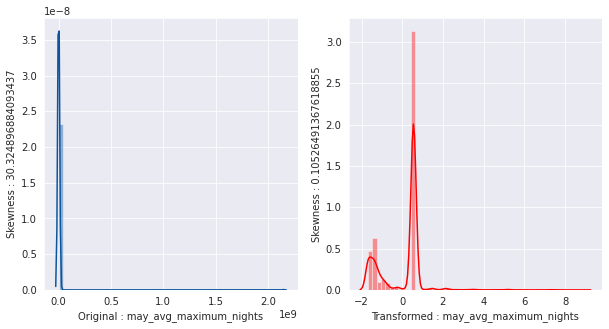

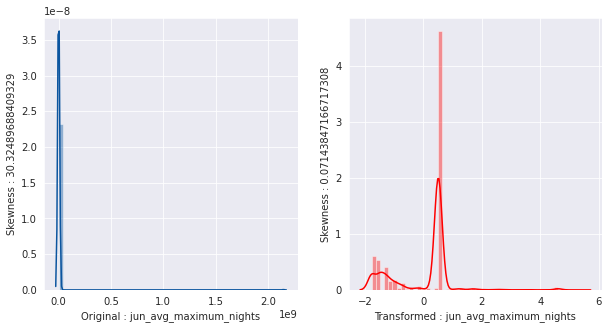

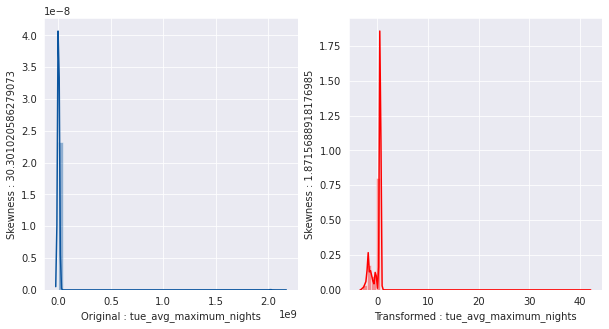

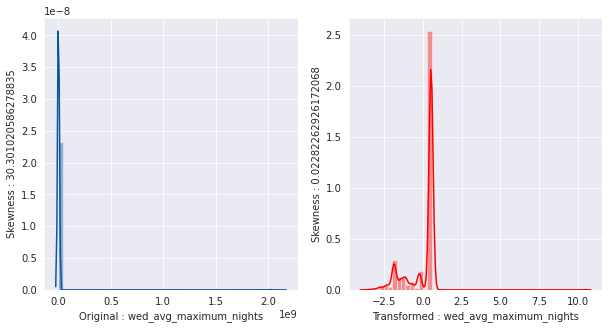

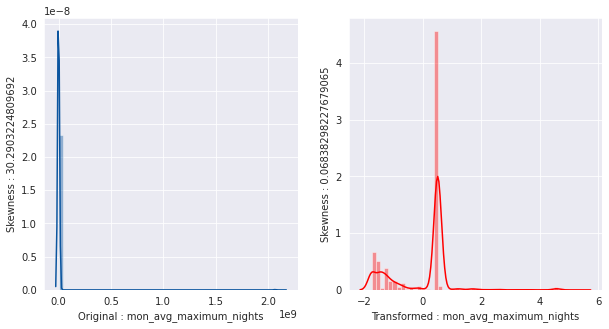

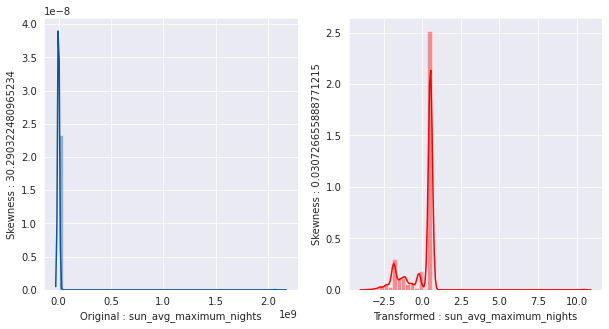

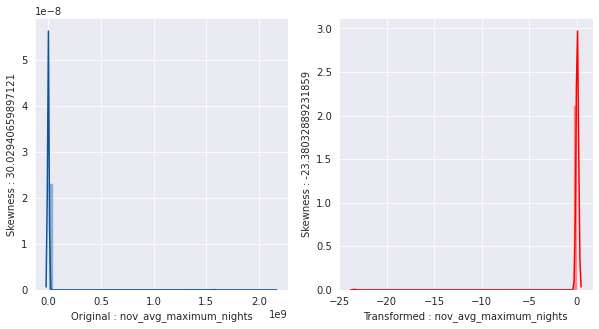

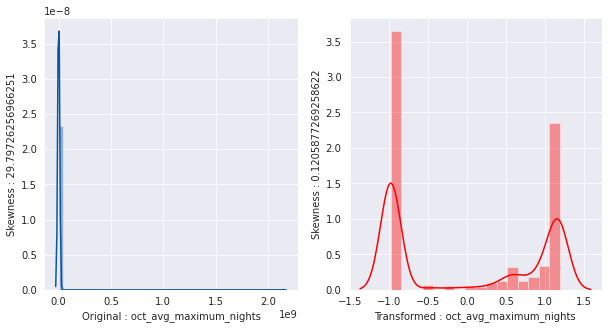

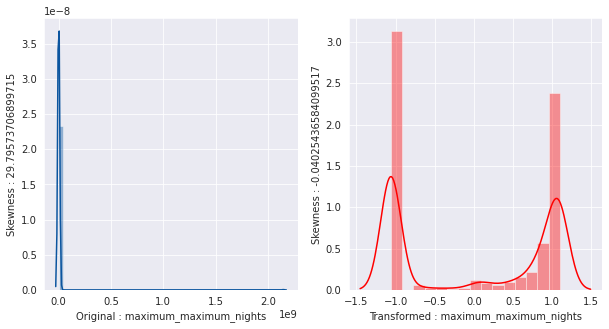

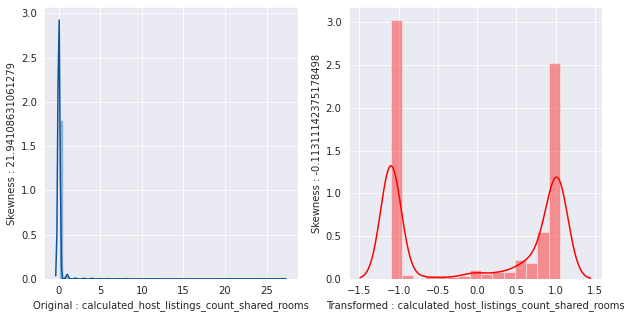

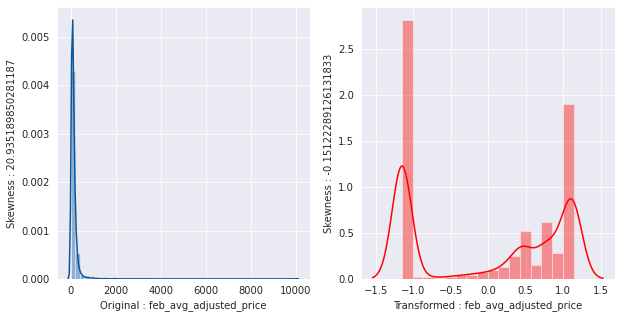

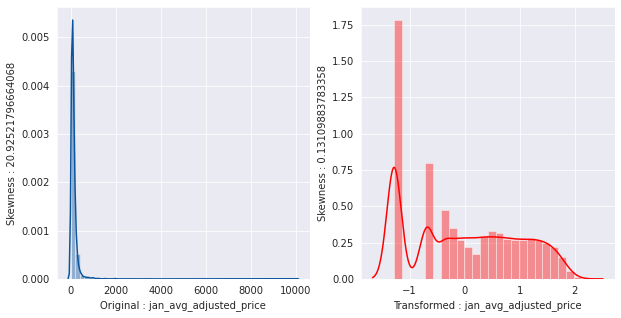

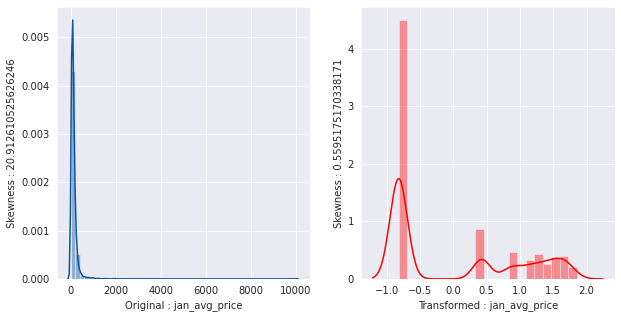

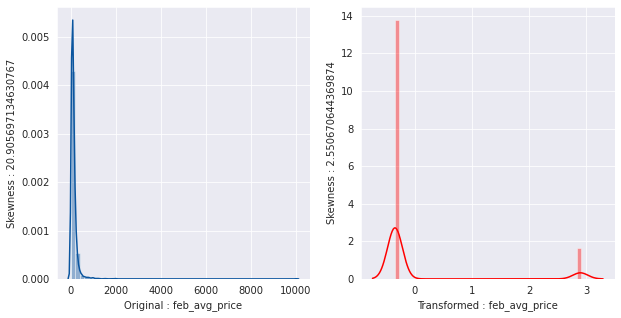

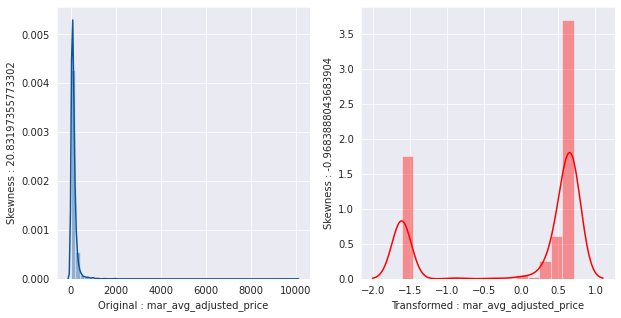

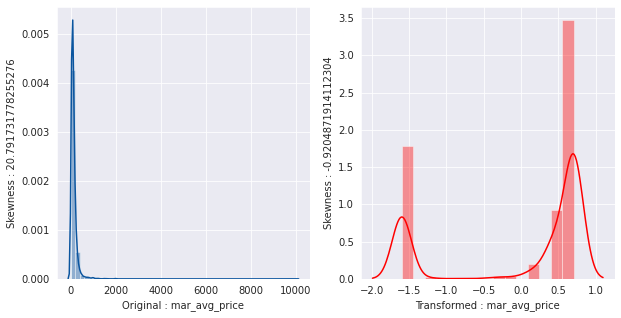

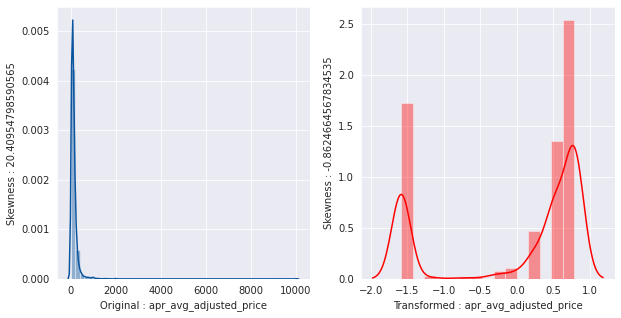

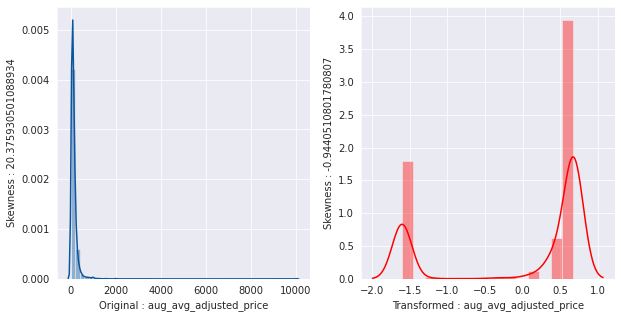

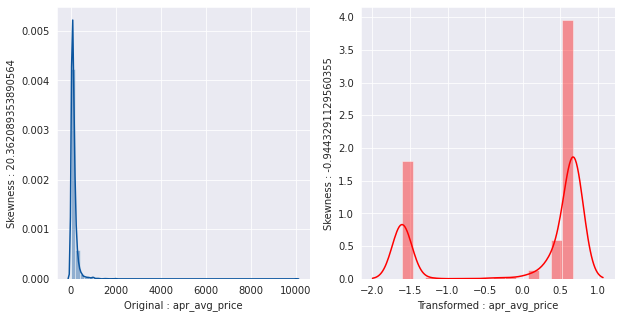

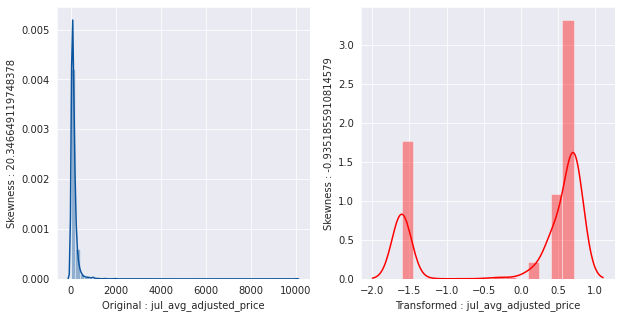

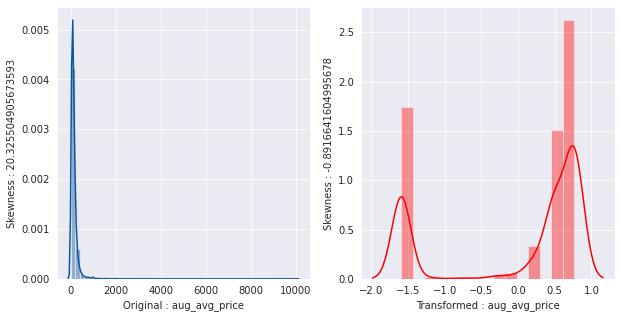

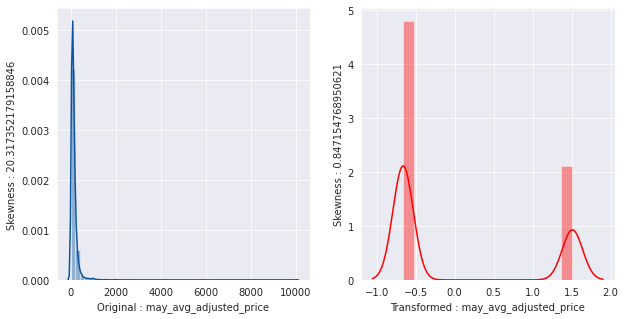

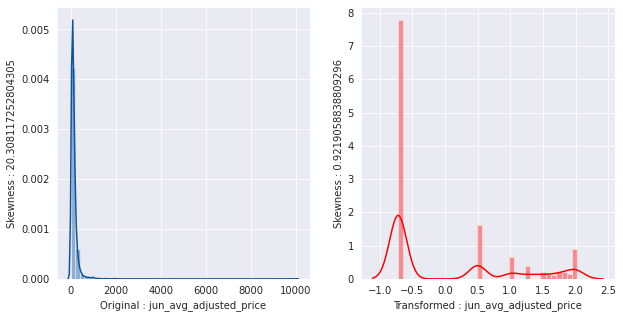

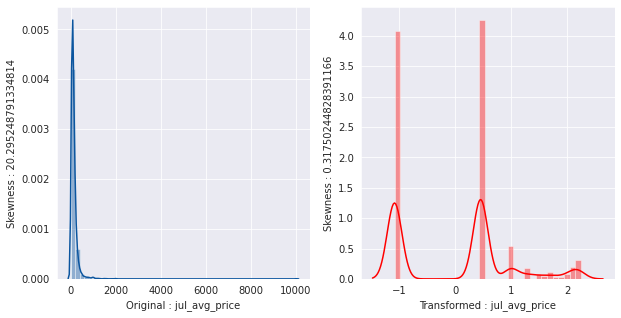

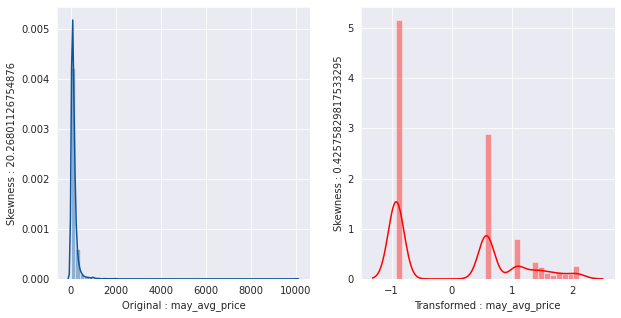

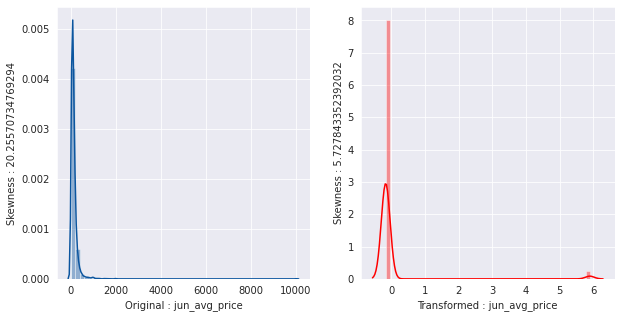

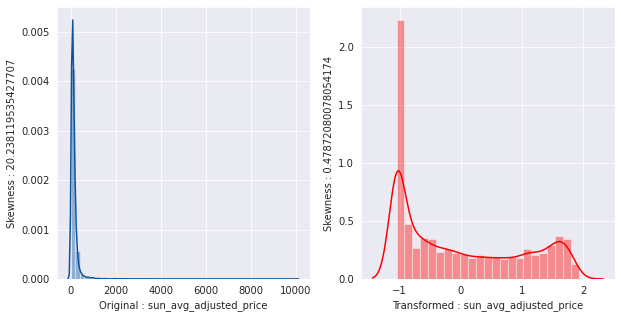

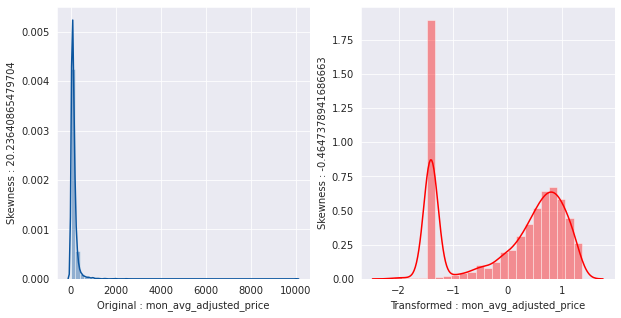

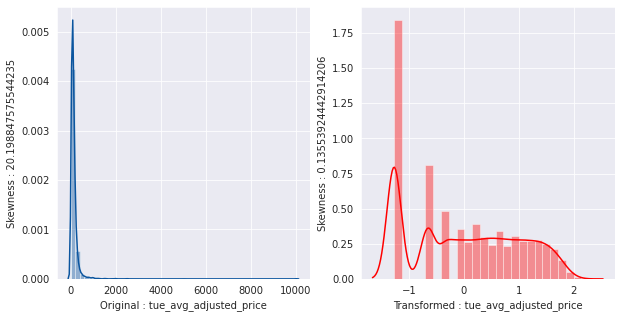

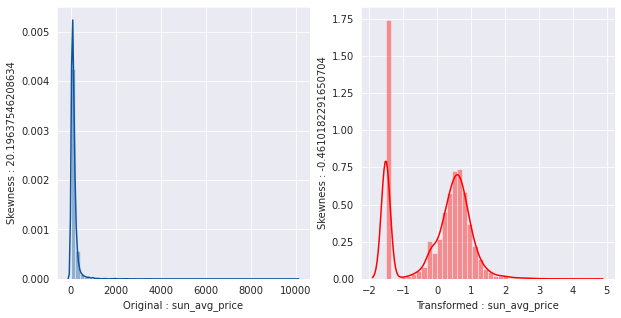

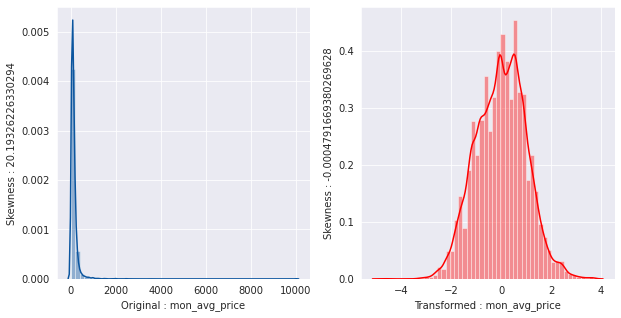

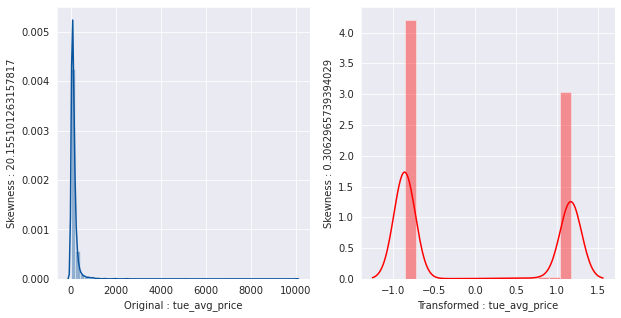

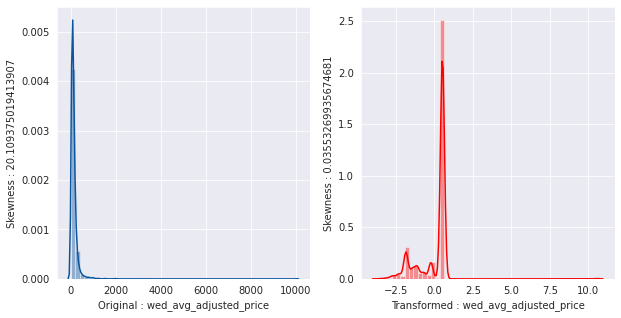

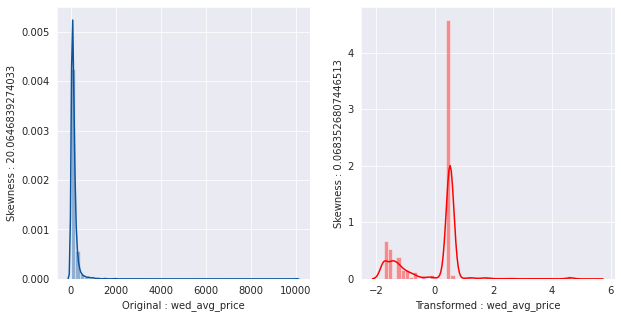

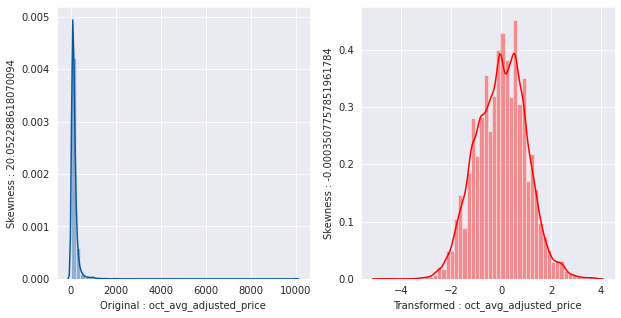

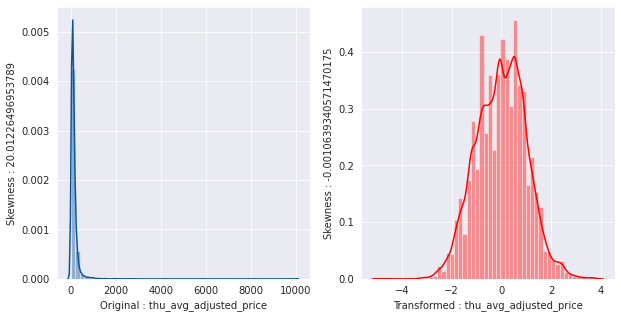

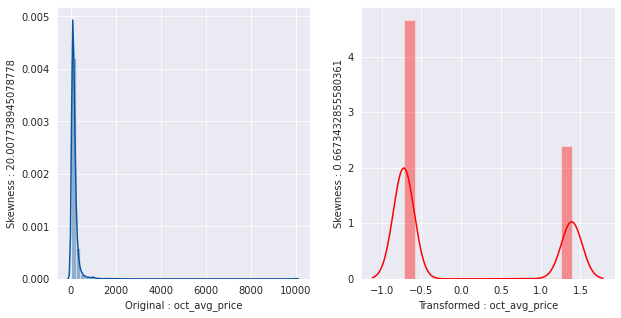

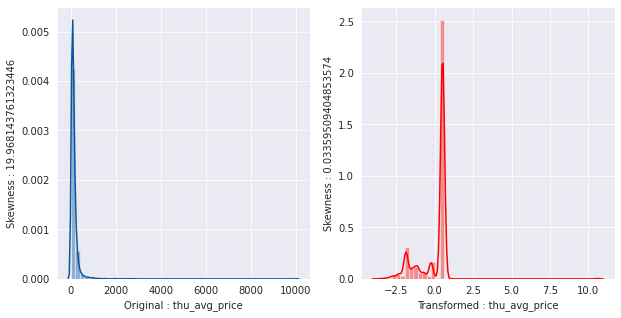

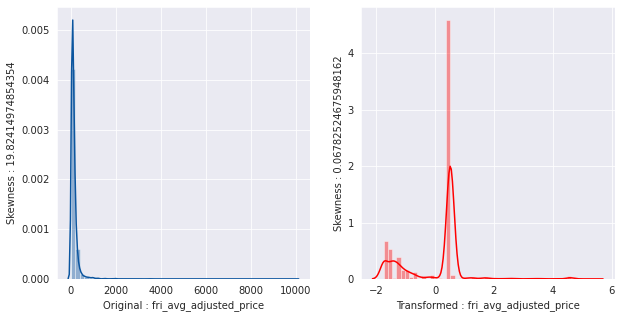

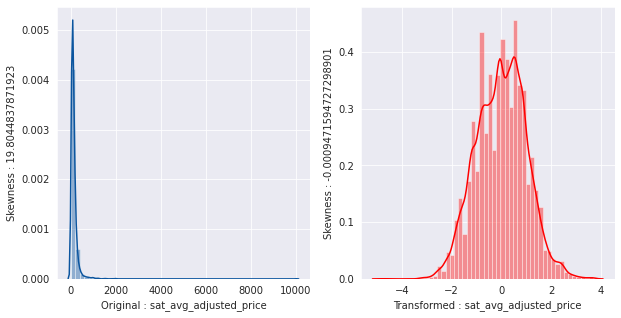

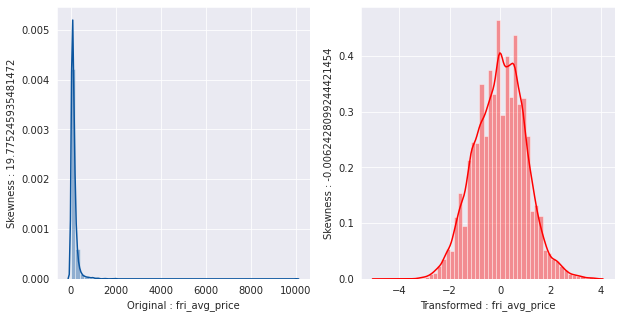

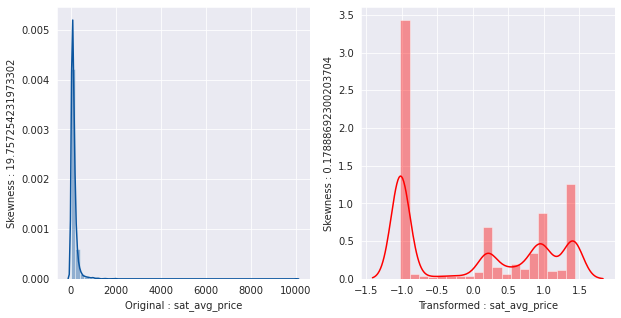

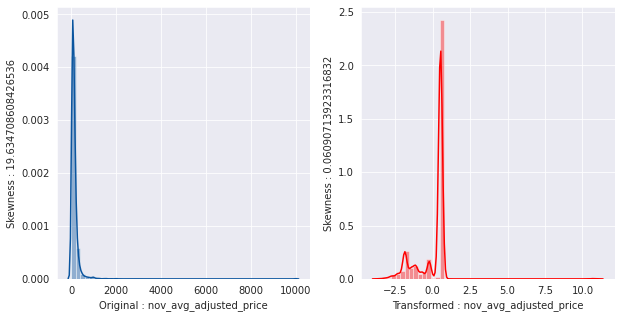

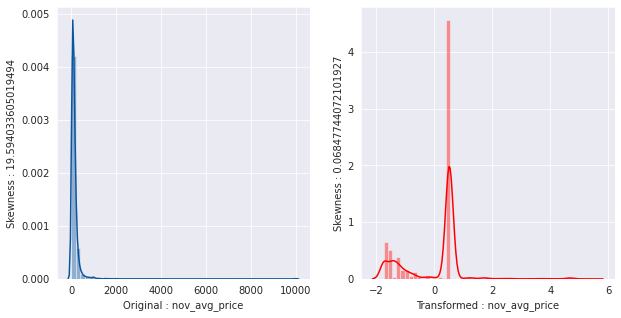

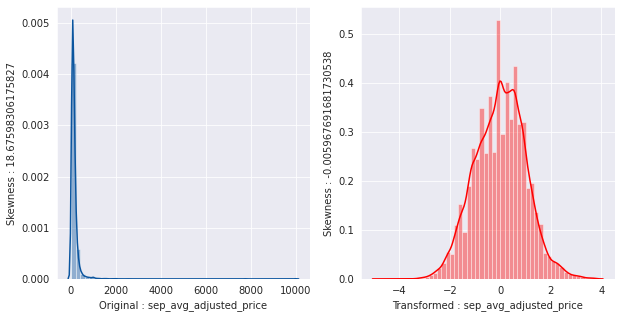

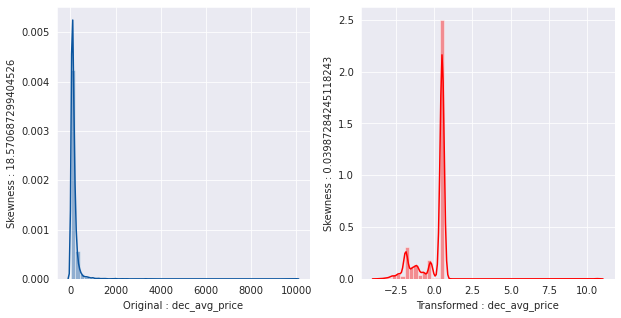

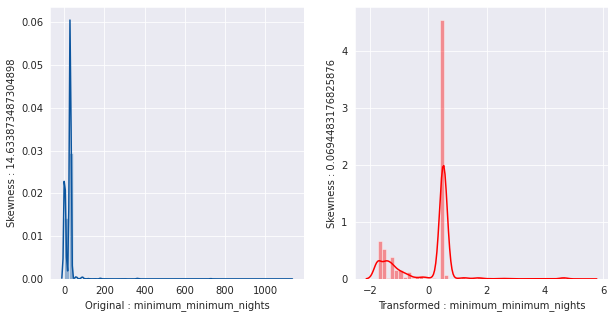

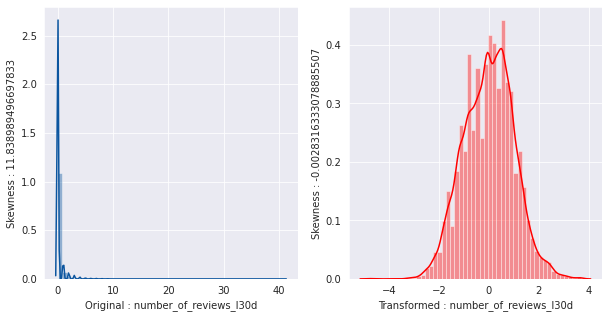

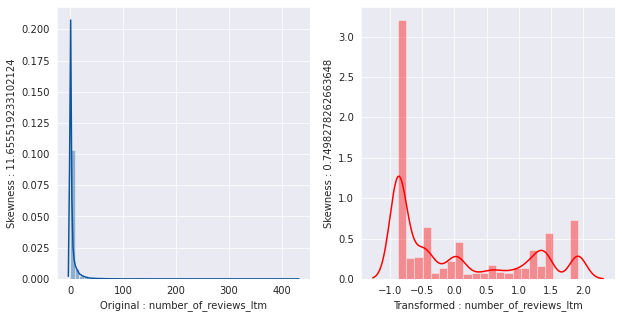

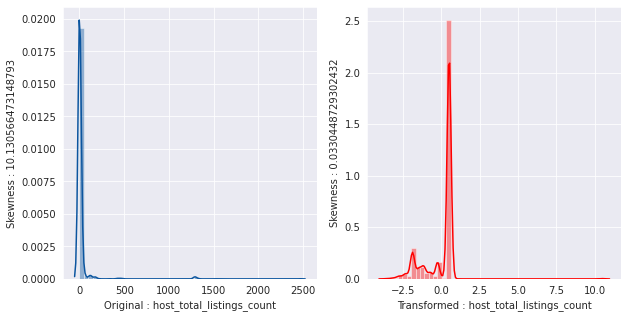

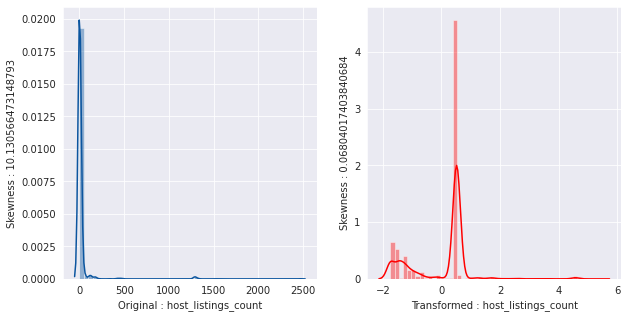

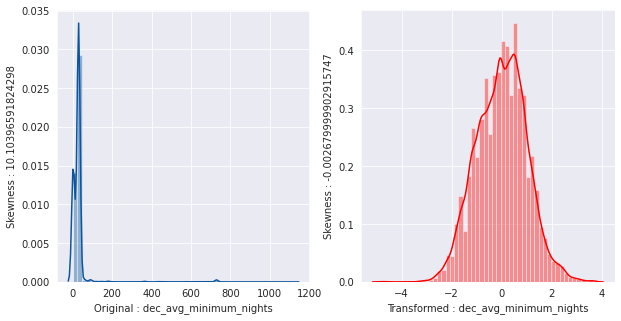

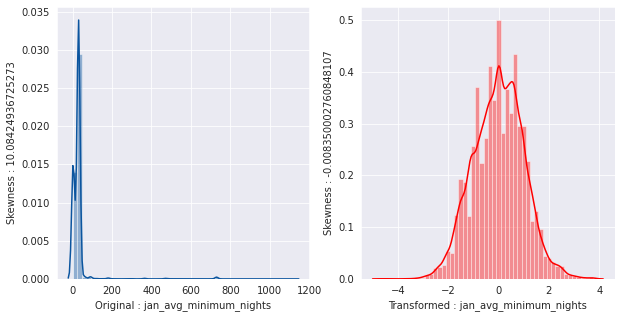

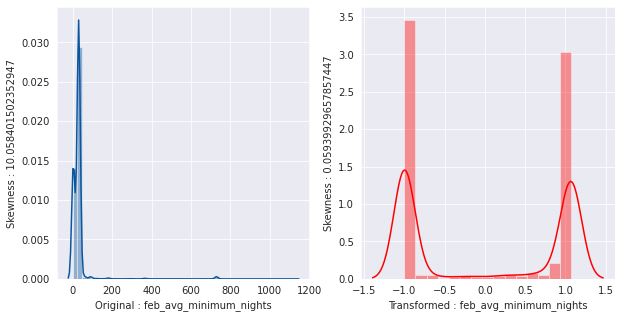

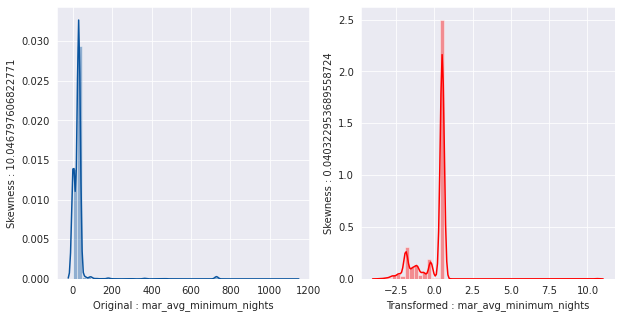

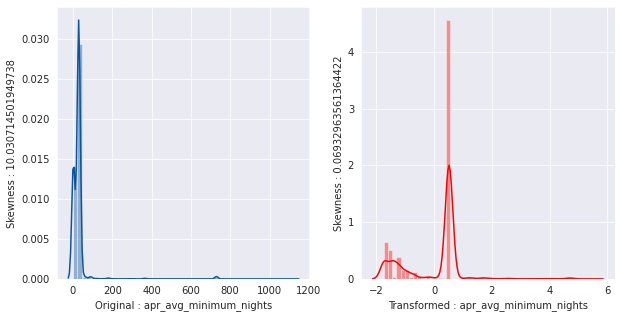

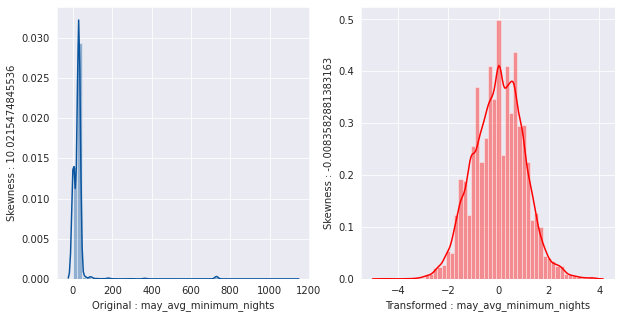

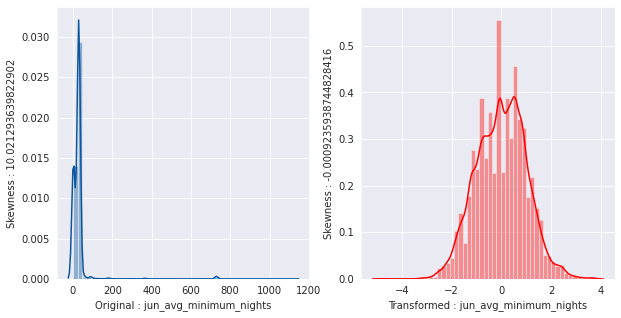

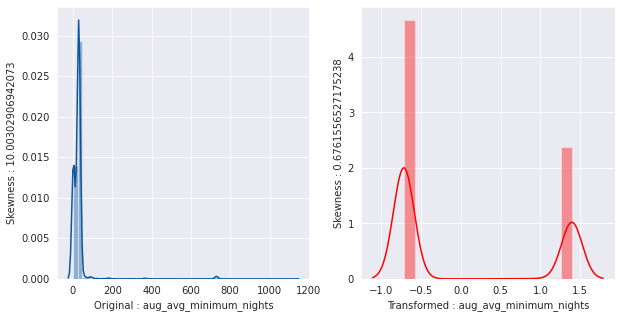

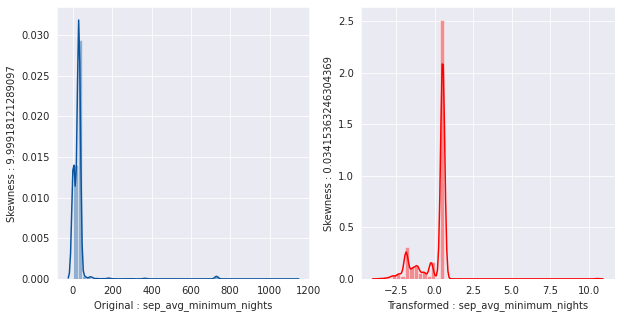

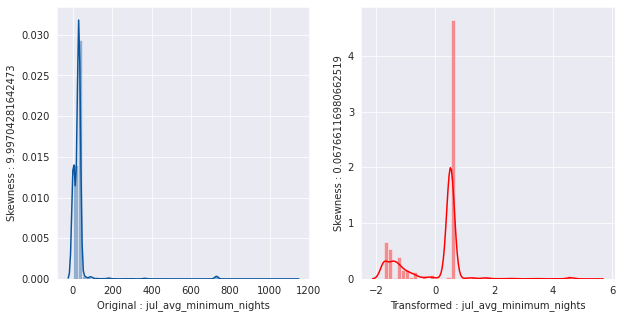

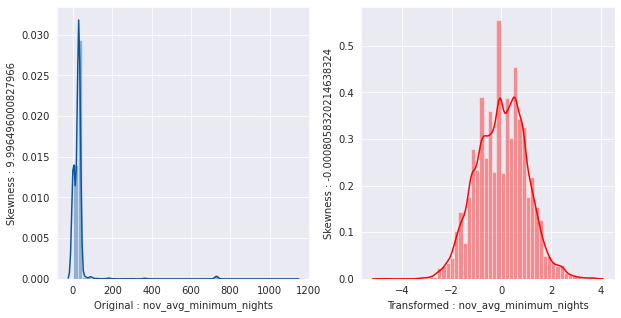

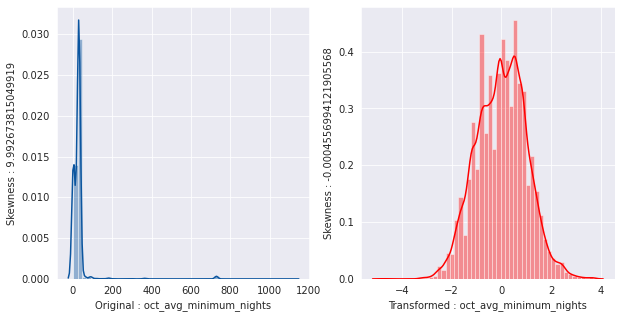

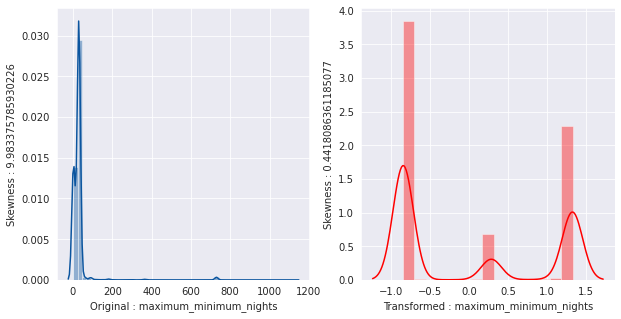

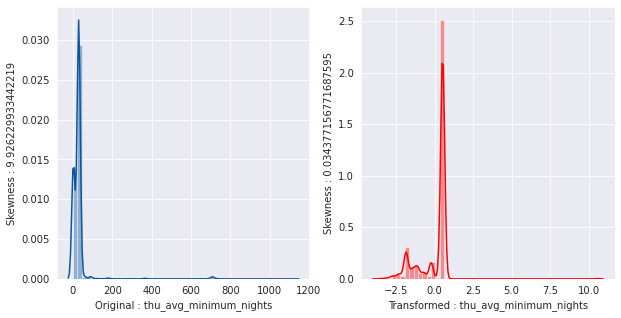

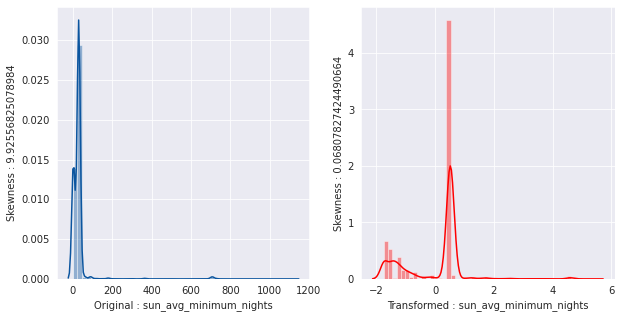

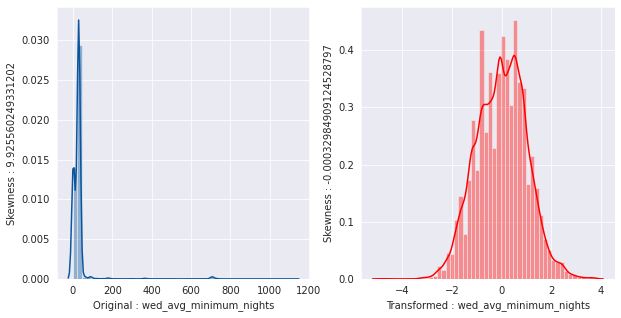

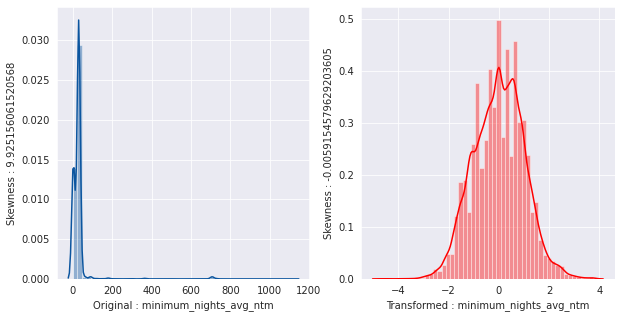

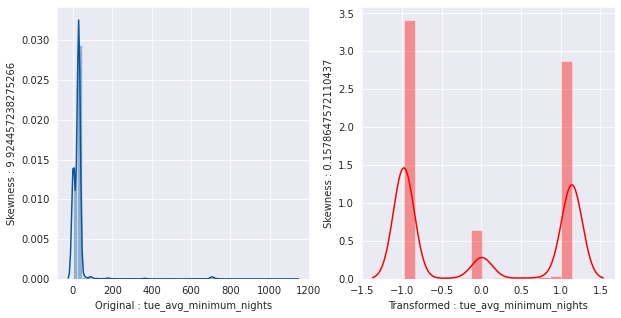

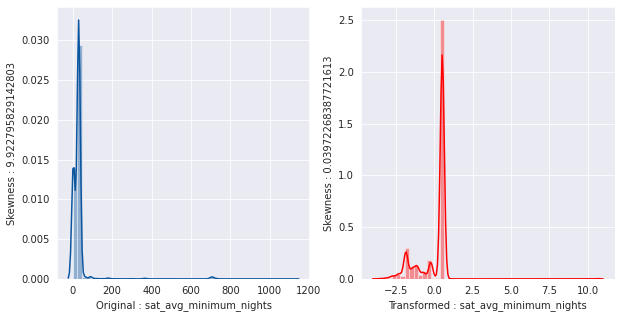

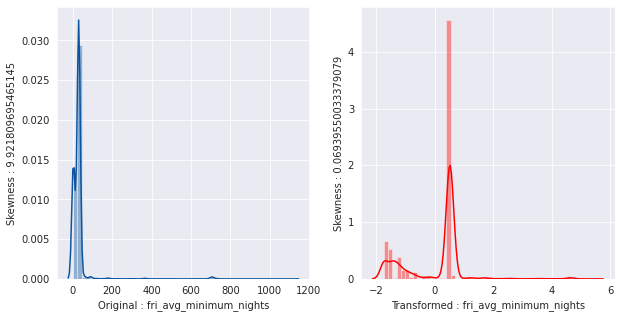

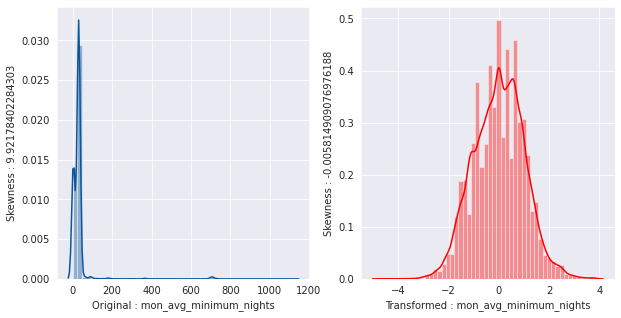

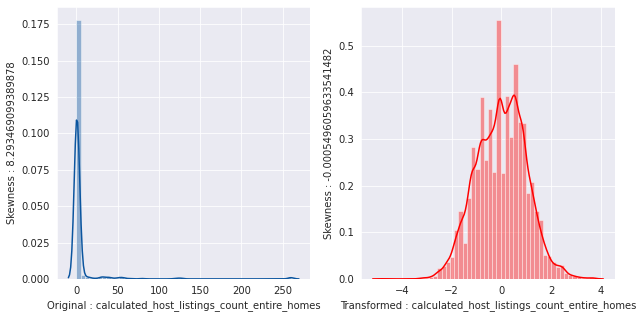

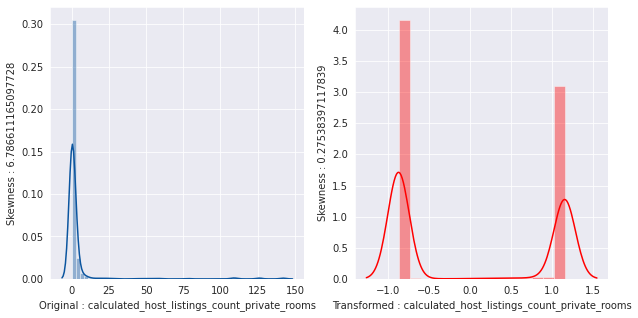

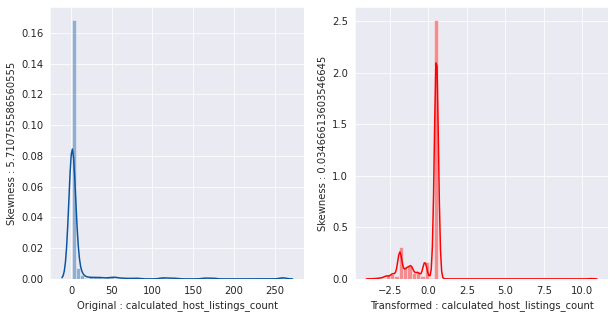

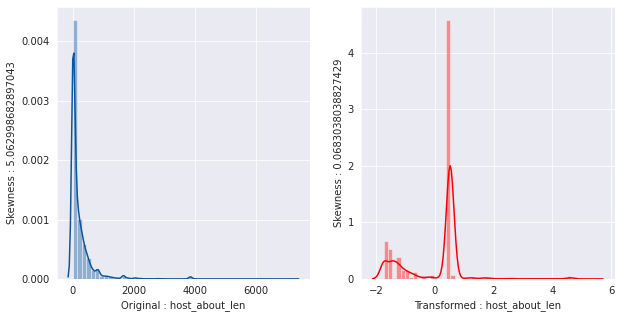

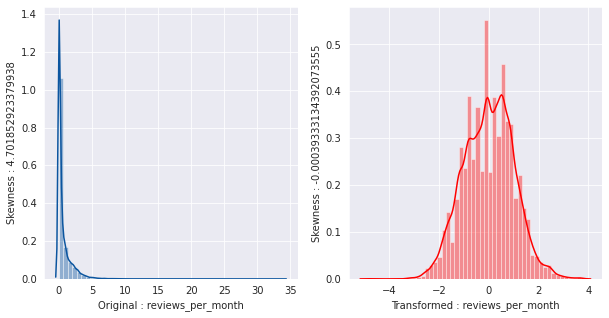

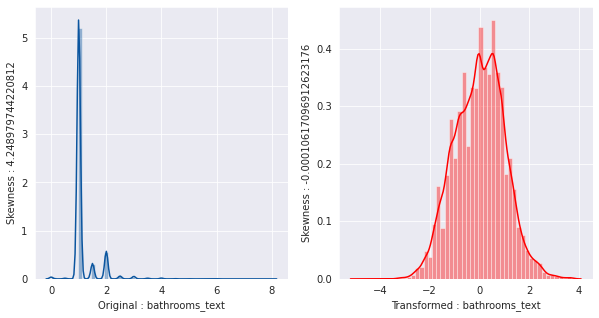

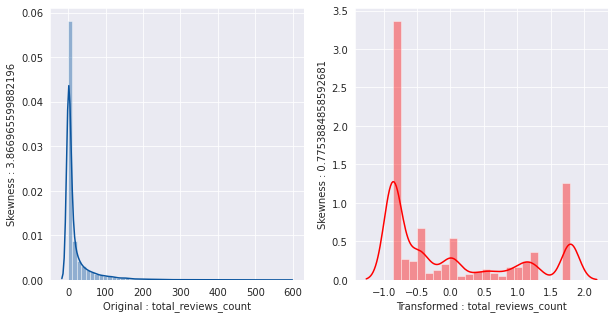

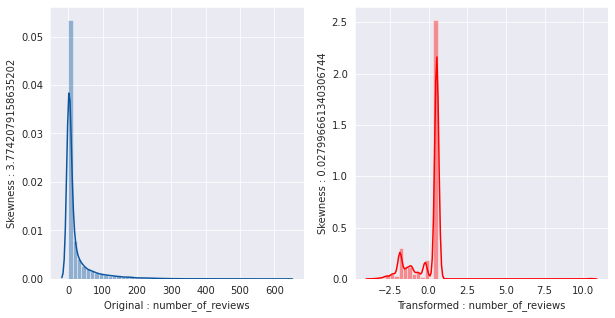

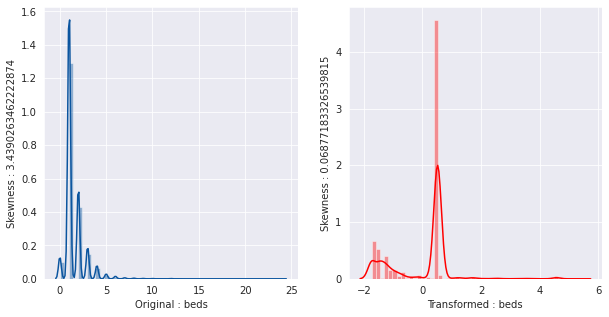

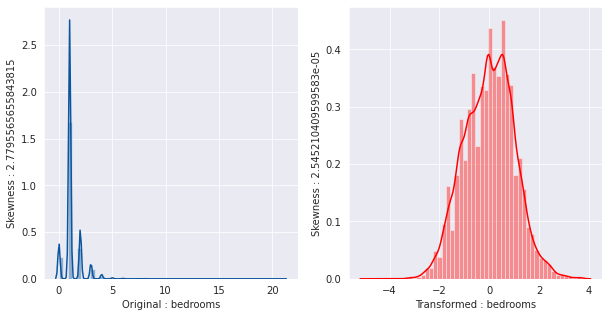

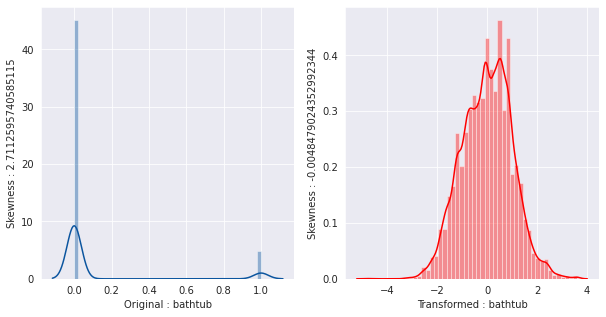

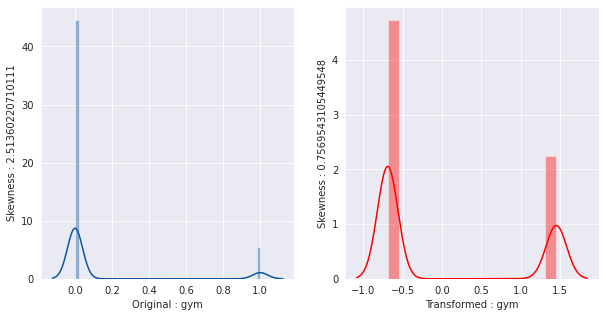

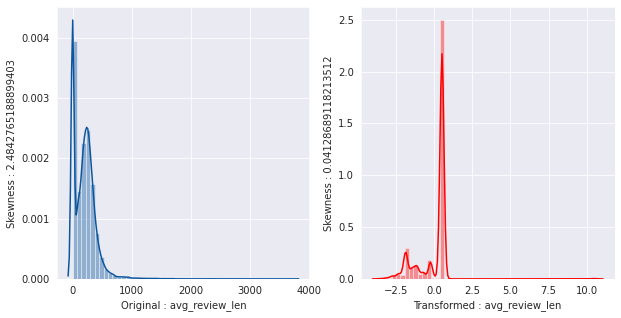

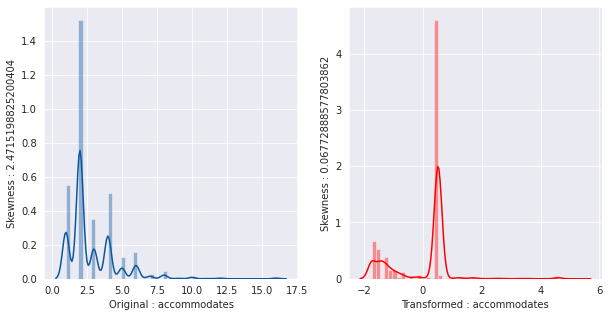

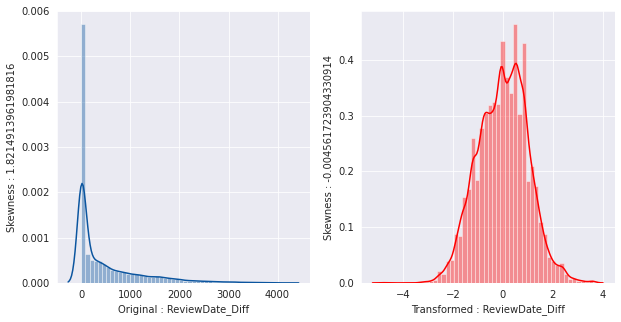

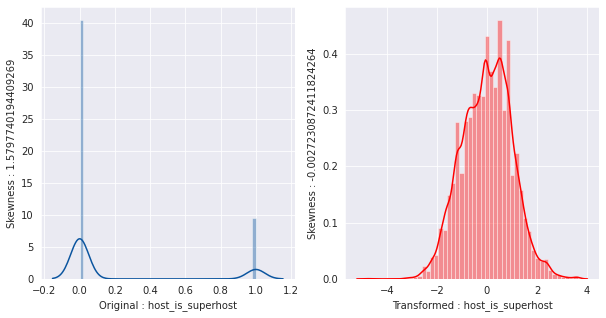

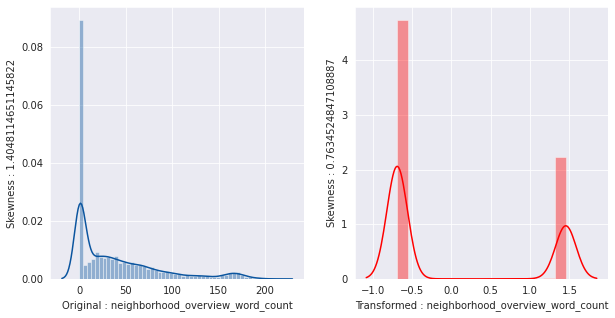

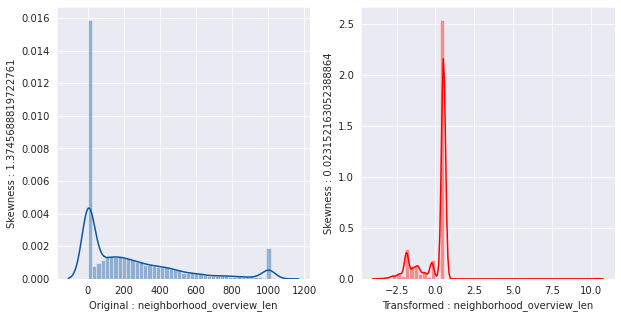

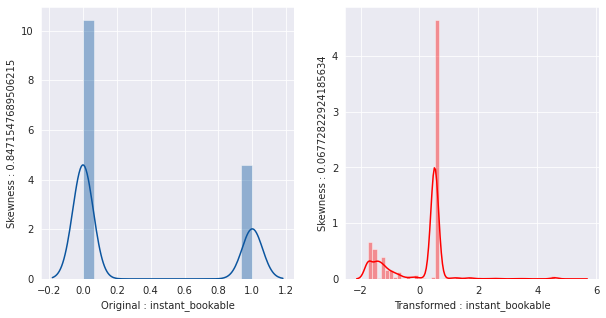

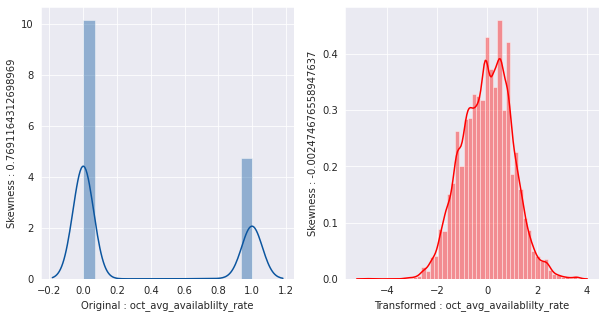

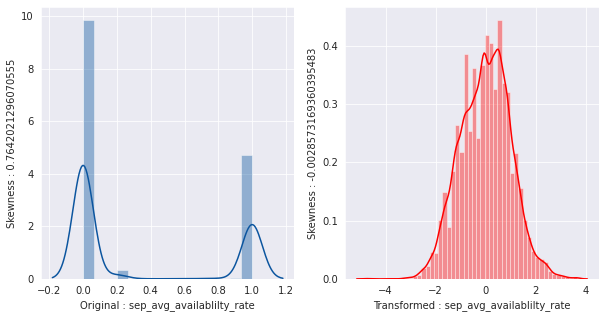

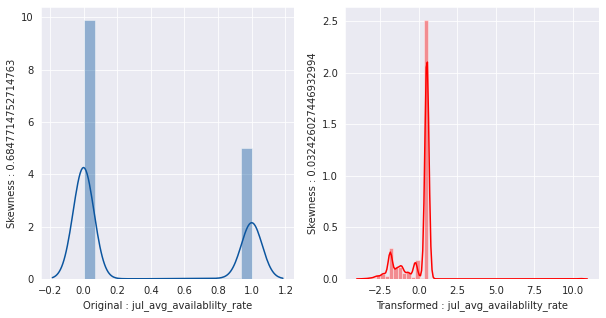

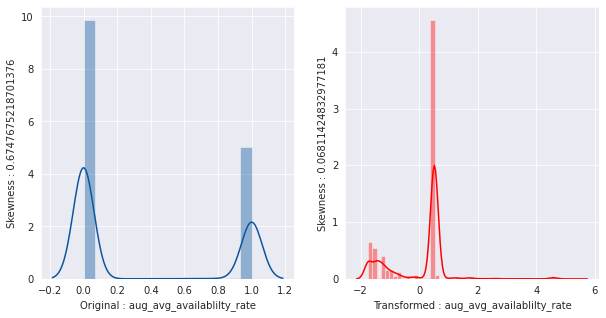

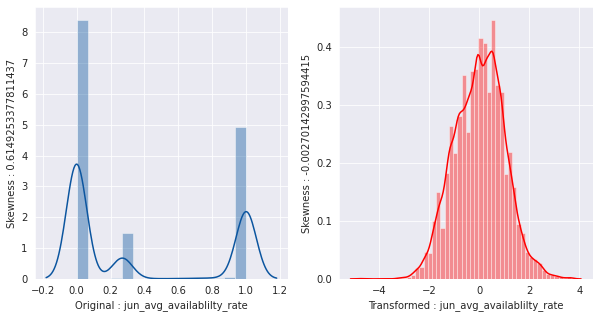

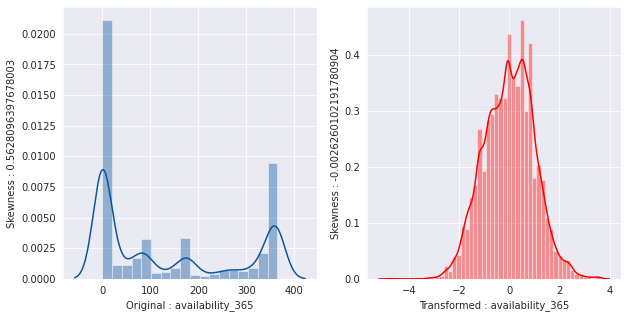

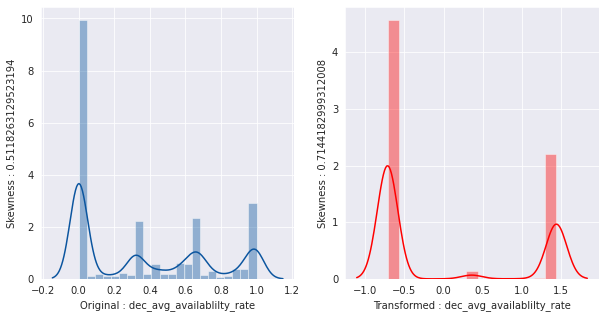

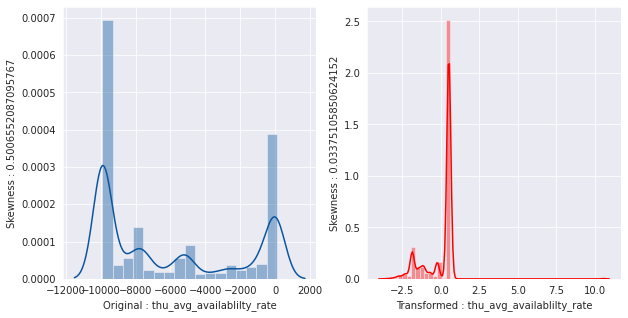

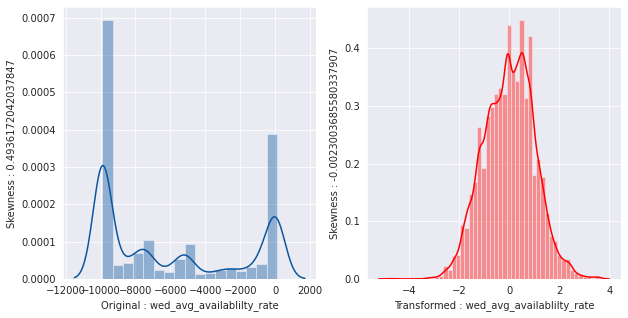

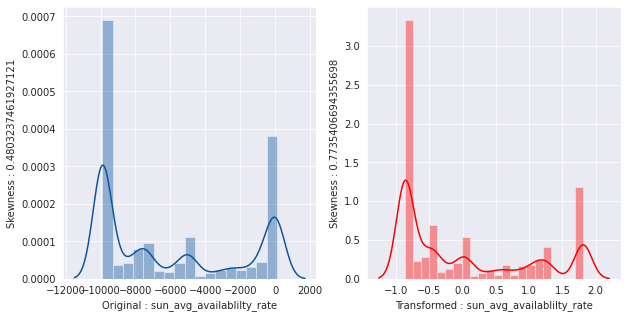

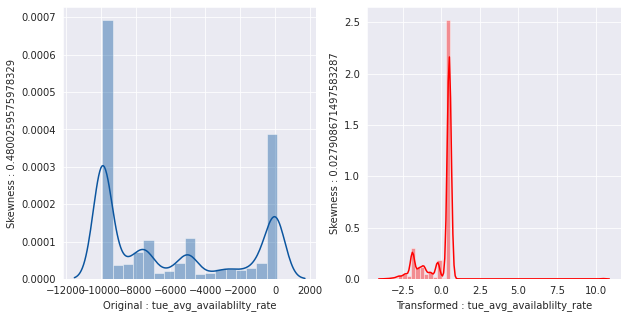

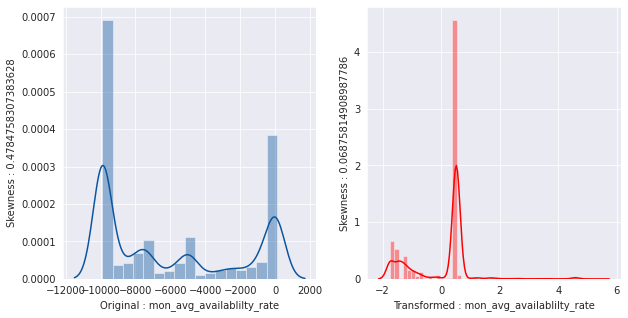

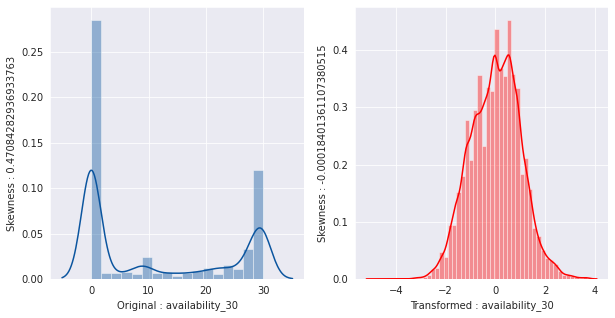

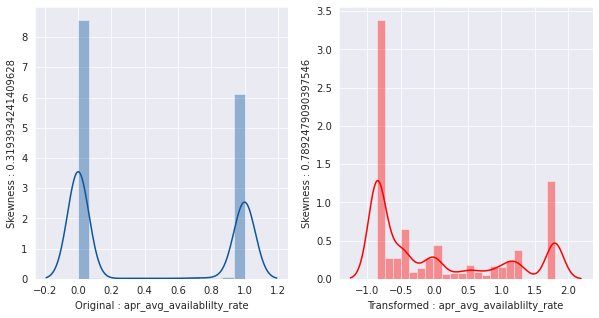

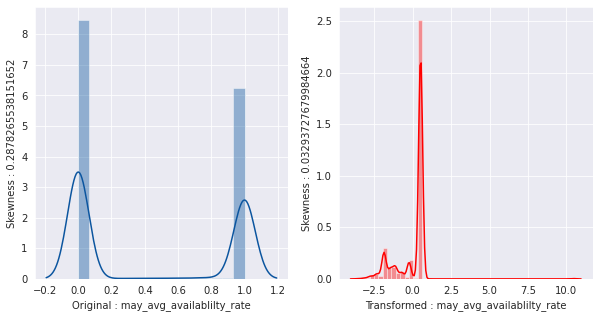

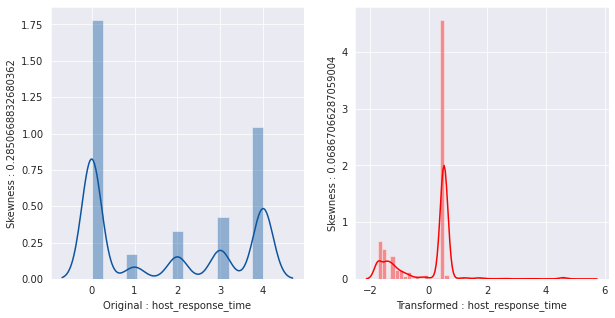

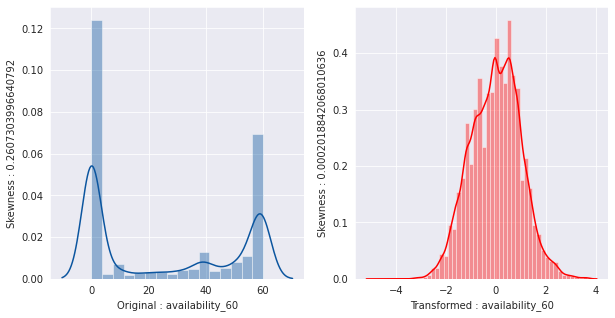

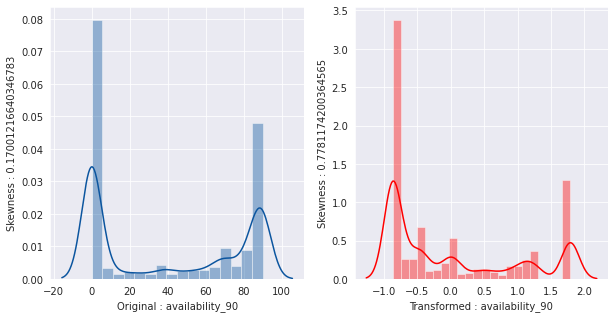

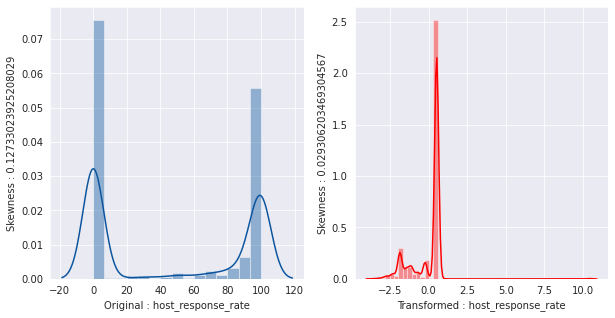

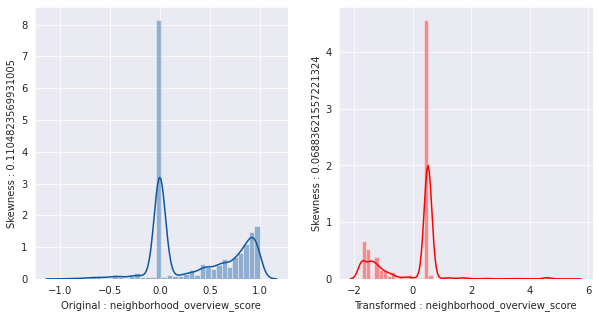

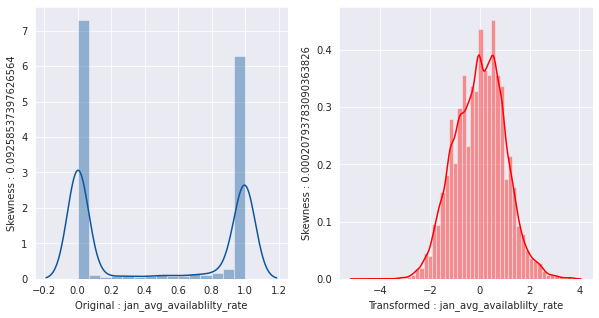

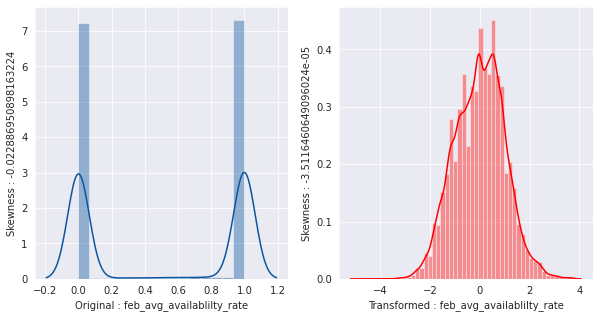

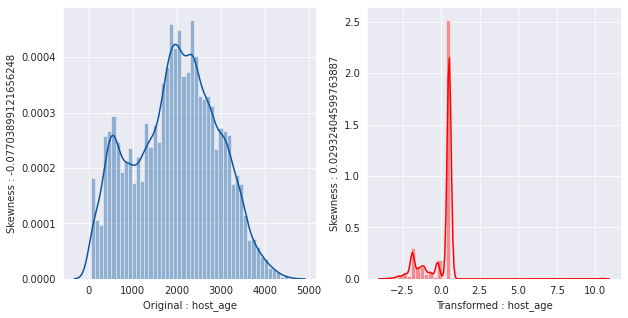

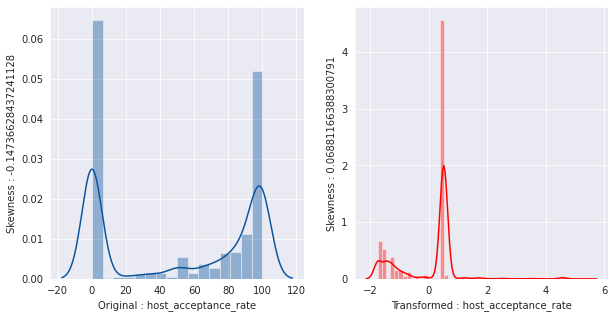

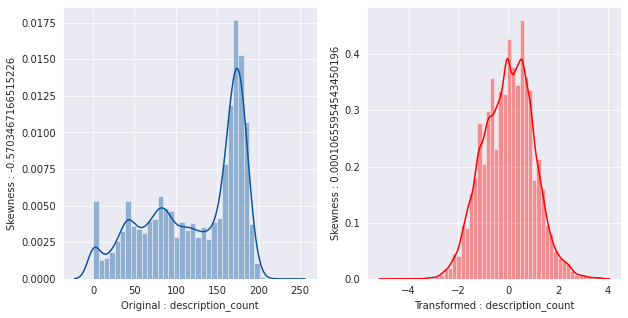

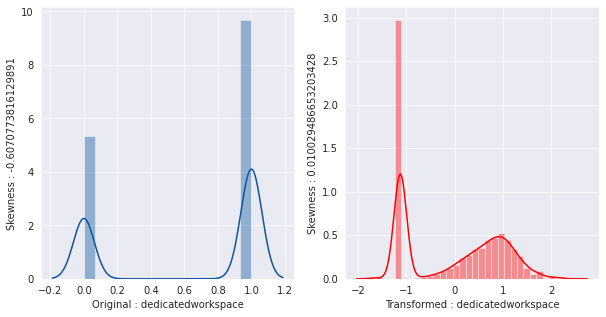

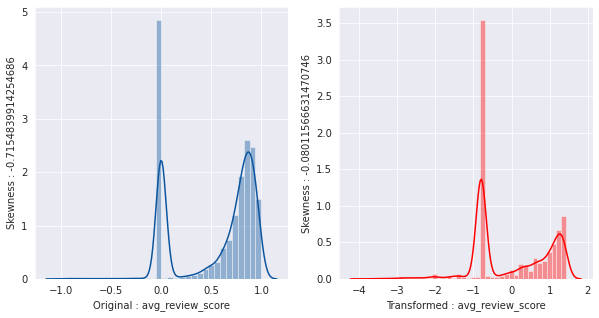

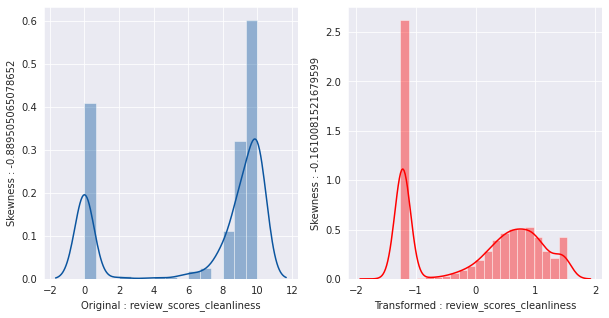

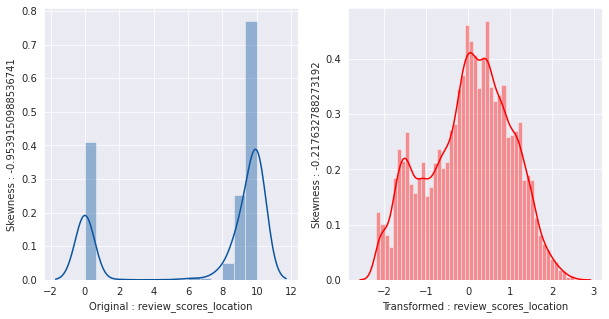

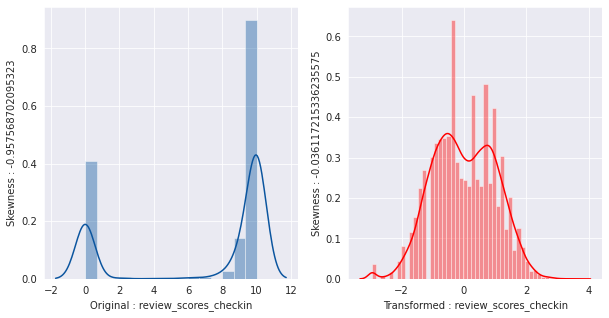

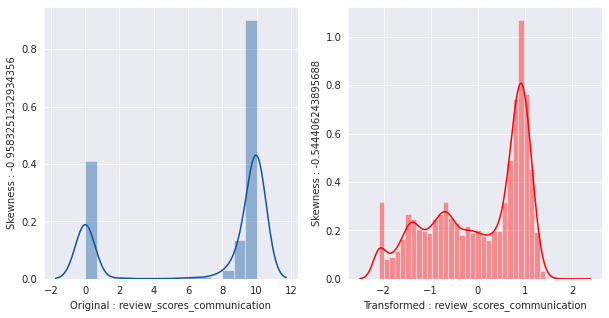

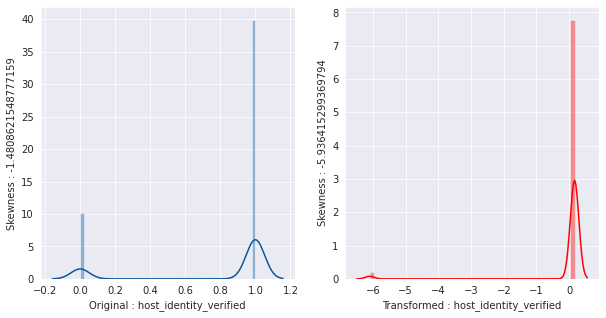

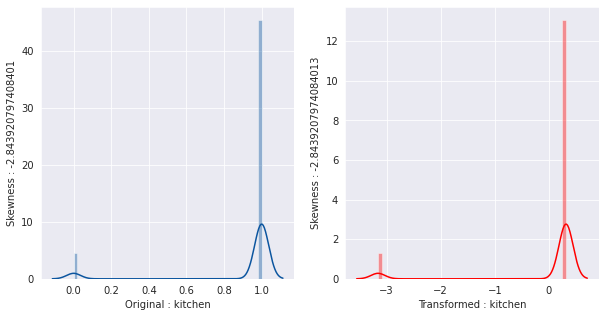

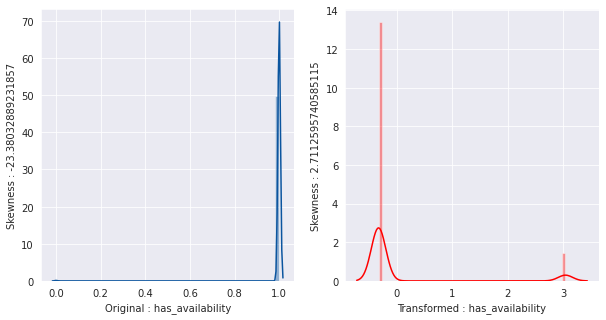

In [17]:
colIndex=0
for col in cols:
   # print("="*10)
   # print("Feature :- ", col)
    skew = X_train[col].skew()
   # print("Skewness:- ",skew)
   # print("="*10)
    sns.set_style("darkgrid")
    sns.set_palette("Blues_r")
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax1 = sns.distplot(X_train[col], ax=axes[0])
    ax1.set(xlabel='Original : ' + col )
    ax1.set(ylabel= 'Skewness : ' + str(skew))
    
    skew1 = df_p1[colIndex].skew()
    sns.set_palette("Paired")
    ax2 = sns.distplot(df_p1[colIndex], ax=axes[1], color = 'r')
    ax2.set(xlabel='Transformed : ' + col)
    ax2.set(ylabel= 'Skewness : ' + str(skew1))
    plt.show()
    colIndex=colIndex+1  

In [18]:
del df_p1

In [19]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
power = power.fit(X_train)

In [20]:
X_train_p=power.transform(X_train)
X_test_p=power.transform(X_test)

# Feature selection using the Mutual Information metric

In [21]:
#https://towardsdatascience.com/how-to-perform-feature-selection-for-regression-problems-c928e527bbfa
#https://machinelearningmastery.com/feature-selection-for-regression-data/
# feature selection
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')# learn relationship from training data
f_selector.fit(X_train, y_train)# transform train input data
X_train_fs = f_selector.transform(X_train)# transform test input data
X_test_fs = f_selector.transform(X_test)# Plot the scores for the features


In [22]:
for i in range(len(f_selector.scores_)):
    print('Feature %d: %s: %f' % (i, X_train.columns[i], f_selector.scores_[i]))


Feature 0: host_response_time: 0.045633
Feature 1: host_response_rate: 0.079603
Feature 2: host_acceptance_rate: 0.098493
Feature 3: host_is_superhost: 0.000149
Feature 4: host_listings_count: 0.172207
Feature 5: host_total_listings_count: 0.166752
Feature 6: host_has_profile_pic: 0.000000
Feature 7: host_identity_verified: 0.002592
Feature 8: accommodates: 0.222421
Feature 9: bathrooms_text: 0.067891
Feature 10: bedrooms: 0.132139
Feature 11: beds: 0.108983
Feature 12: minimum_nights: 0.024024
Feature 13: maximum_nights: 0.031970
Feature 14: minimum_minimum_nights: 0.017135
Feature 15: maximum_minimum_nights: 0.034794
Feature 16: minimum_maximum_nights: 0.021222
Feature 17: maximum_maximum_nights: 0.014264
Feature 18: minimum_nights_avg_ntm: 0.054910
Feature 19: maximum_nights_avg_ntm: 0.023102
Feature 20: has_availability: 0.000000
Feature 21: availability_30: 0.015951
Feature 22: availability_60: 0.018511
Feature 23: availability_90: 0.034560
Feature 24: availability_365: 0.050259
F

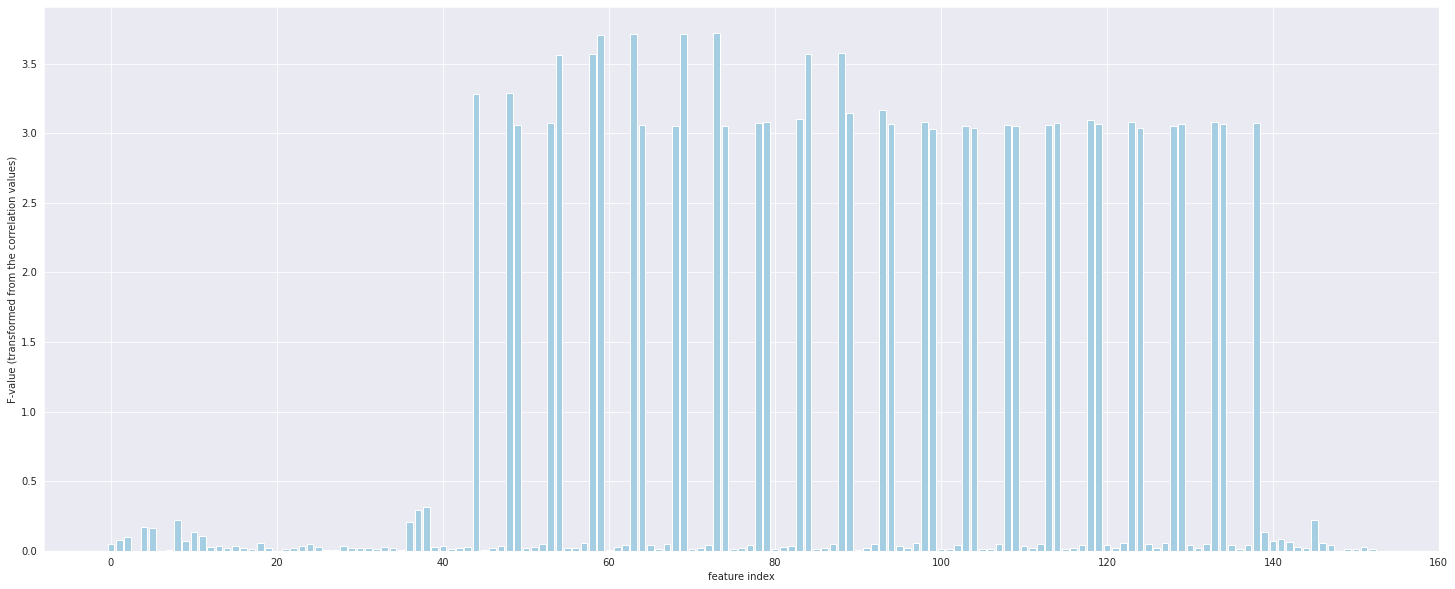

In [23]:
# plot the scores
# Plot the scores for the features
plt.figure(figsize=(25,10))
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_,width = 0.8)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [ ]:
#Based on  Graph top columns are between 50- 130, so are selected top 80 columns

In [24]:
#https://towardsdatascience.com/how-to-perform-feature-selection-for-regression-problems-c928e527bbfa
#https://machinelearningmastery.com/feature-selection-for-regression-data/
# feature selection
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k=80)# learn relationship from training data
f_selector.fit(X_train, y_train)# transform train input data
X_train_fs = f_selector.transform(X_train)# transform test input data
X_test_fs = f_selector.transform(X_test)# Plot the scores for the features


In [25]:
X_train_fs.shape

(25830, 80)

In [26]:
X_test_fs.shape

(11070, 80)

In [27]:
X_train_Final = np.hstack((X_train_fs, _DF_vector_train.values)) 

In [28]:
X_train_Final.shape

(25830, 5129)

In [29]:
X_test_Final=np.hstack((X_test_fs, _DF_vector_test.values)) 

In [30]:
X_test_Final.shape

(11070, 5129)